In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas_profiling
import seaborn as sns

In [2]:
df_cost=pd.read_csv('./data/government-expenditure-on-tertiary-education-by-country.csv')
df_gdp_rate=pd.read_csv('./data/government-expenditure-per-student-tertiary-of-gdp-per-capita.csv')
df_enrollment=pd.read_csv('./data/gross-enrollment-ratio-in-tertiary-education.csv')
df_gpi=pd.read_csv('./data/gpi-tertiary-education.csv')
df_sex_rate=pd.read_csv('./data/percentage-of-all-students-in-tertiary-education-enrolled-in-isced-6-both-sexes.csv')
df_female=pd.read_csv('./data/share-graduates-stem-female.csv')
df_15_edu=pd.read_csv('./data/population-breakdown-by-highest-level-of-education-achieved-for-those-aged-15-in.csv')
df_15_edu_country=pd.read_csv('./data/projections-of-the-share-of-the-population-aged-15-educated-to-degree-level-by-country.csv')
df_school_life=pd.read_csv('./data/school-life-expectancy-from-primary-to-tertiary-education.csv')
df_private_edu=pd.read_csv('./data/precentage-enrolled-in-private-institutions-at-the-tertiary-education-level.csv')
df_from_abroad=pd.read_csv('./data/share-of-students-from-abroad.csv')
df_studying_abroad=pd.read_csv('./data/share-of-students-studying-abroad.csv')
df_post_secondary=pd.read_csv('./data/share-of-the-population-with-a-completed-post-secondary-education.csv')
df_complete_edu=pd.read_csv('./data/share-of-the-population-with-completed-tertiary-education.csv')
df_secondary_no_tertiary=pd.read_csv('./data/share-of-the-population-with-secondary-education-but-no-tertiary-education.csv')
df_gender_ratio=pd.read_csv('./data/gender-ratios-for-mean-years-of-schooling.csv')
df_female_average_eductaion=pd.read_csv('./data/mean-years-of-schooling-female.csv')
df_male_average_education=pd.read_csv('./data/mean-years-of-schooling-male.csv')


### 下面的几个函数分别代表了
- 把最小型转换成最大型 dataDirection_1
- 把中间型转换成最大型 dataDirection_2
- 把区间型转换成最大型 dataDirection_3
- 矩阵标准化 temp2
- 计算得分之后进行归一化 temp3

In [3]:
#min_scoring
def dataDirection_1(datas):         
        return np.max(datas)-datas     

#mid_scoring
def dataDirection_2(datas, x_best):
    temp_datas = datas - x_best
    M = np.max(abs(temp_datas))
    answer_datas = 1 - abs(datas - x_best) / M     
    return answer_datas
    
#period_scoring
def dataDirection_3(datas, x_min, x_max):
    M = max(x_min - np.min(datas), np.max(datas) - x_max)
    answer_list = []
    for i in datas:
        if(i < x_min):
            answer_list.append(1 - (x_min-i) /M)      
        elif( x_min <= i <= x_max):
            answer_list.append(1)
        else:
            answer_list.append(1 - (i - x_max)/M)
    return np.array(answer_list)   

#matrix_standard
def temp2(datas):
    K = np.power(np.sum(pow(datas,2),axis =1),0.5)
    for i in range(0,K.size):
        for j in range(0,datas[i].size):
            datas[i,j] = datas[i,j] / K[i]      
    return datas

#normalized
def temp3(answer2):
    list_max = np.array([np.max(answer2[0,:]),np.max(answer2[1,:]),np.max(answer2[2,:]),np.max(answer2[3,:])])  
    list_min = np.array([np.min(answer2[0,:]),np.min(answer2[1,:]),np.min(answer2[2,:]),np.min(answer2[3,:])])  
    max_list = []       
    min_list = []       
    answer_list=[]      
    for k in range(0,np.size(answer2,axis = 1)):        
        max_sum = 0
        min_sum = 0
        for q in range(0,4):                                
            max_sum += np.power(answer2[q,k]-list_max[q],2)
            min_sum += np.power(answer2[q,k]-list_min[q],2)     
        max_list.append(pow(max_sum,0.5))
        min_list.append(pow(min_sum,0.5))
        answer_list.append(min_list[k]/ (min_list[k] + max_list[k]))    
        max_sum = 0
        min_sum = 0
    answer = np.array(answer_list)      
    return (answer / np.sum(answer))

### 这里是第一个特征代表了高等学校人均政府支出占人均GDP的百分比
- 这里我们把它当最小型处理，转换成最大型

In [4]:
#GDP_rating
year=[]
country=['United States','Japan','Turkey',
'Poland','United Kingdom',
'Germany',
'France',
'Switzerland','Sweden','India']
average=[]
rate_score=[]

for i in range(2005,2015):
    year.append(str(i))
    
#calculate the average rate between 2005 and 2015
for temp in country:
    rate=df_gdp_rate[((df_gdp_rate["Entity"].isin([temp]))&(df_gdp_rate["Year"].isin(year)))]
    average.append(rate["Government expenditure per student, tertiary (% of GDP per capita)"].mean())
gdp_rate_score=dataDirection_1(average)
gdp_rate_score

array([40.69230036, 39.97007437, 37.59218134, 41.61287932, 34.6156981 ,
       24.72602953, 26.36373781, 20.25634302, 22.05118098,  0.        ])

In [5]:
# average=[]
# contient_name=['Advanced Economies,Asia and the Pacific,Eastern Europe',
# 'Latin America and the Caribbean',
# 'Middle East and North Africa',
# 'Sub-Saharan Africa'
# ]
# for temp in country:
#     rate=df_gender_ratio[((df_gender_ratio["Entity"].isin([contient_name]))&(df_gender_ratio["Year"].isin(year)))]
#     average.append(rate["Regional female to male years schooling (Lee-Lee (2016))"].mean())
# average=np.array(average)

### 这里是第二个特征，GPI
- 这个参数的含义是
$$ GPI=女性净入学率/男性净入学率 $$
- 我这里把它当作区间型来处理，主要是在worldbank上面对于这个性别均等的定义是GPI位于0.97和1.03之间

In [6]:
#gpi_rating
average=[]
for temp in country:
    rate=df_gpi[((df_gpi["Entity"].isin([temp]))&(df_gpi["Year"].isin(year)))]
    average.append(rate["Gross enrolment ratio, tertiary, gender parity index (GPI)"].mean())
average=np.array(average)
gender_rate_score=dataDirection_3(average,0.97,1.03)
gender_rate_score

array([0.27597281, 0.85029992, 0.66471162, 0.15889269, 0.36863637,
       0.92172108, 0.56256474, 0.99938167, 0.        , 0.5837049 ])

### 这里是第三个特征
- 这个参数的含义是在该国高等教育总入学人数中来自国外学生的份额
- 我们这里把它当作区间型进行处理，希望的区间是20-50（相关文献获得的）

In [7]:
#students from abroad
average=[]
for temp in country:
    rate=df_from_abroad[((df_from_abroad["Entity"].isin([temp]))&(df_from_abroad["Year"].isin(year)))]
    average.append(rate["Inbound mobility rate, both sexes (%)"].mean())
average=np.array(average)
from_abroad_rate_score=dataDirection_3(average,20,50)
from_abroad_rate_score

array([0.16892177, 0.16804602, 0.03688539, 0.03712741, 0.77690461,
       0.35027078, 0.56211965, 0.82288721, 0.29630599, 0.        ])

### 这里是第四个特征
- 这个参数的含义是给定国家在国外学习的学生人数占该国高等教育总入学人数的百分比
- 这里我们把它当作最小型分布进行处理

In [8]:
#students go abroad
average=[]
for temp in country:
    rate=df_studying_abroad[((df_studying_abroad["Entity"].isin([temp]))&(df_studying_abroad["Year"].isin(year)))]
    average.append(rate["Outbound mobility ratio, all regions, both sexes (%)"].mean())
average=np.array(average)
go_abroad_rate_score=dataDirection_1(average)
go_abroad_rate_score

array([4.33013439, 3.41634269, 3.04407661, 3.24563106, 3.59420993,
       0.34475793, 2.03862884, 0.        , 1.13038993, 3.6636344 ])

In [9]:
# #students with post secondary education
# average=[]
# for temp in country:
#     rate=df_post_secondary[((df_post_secondary["Entity"].isin([temp]))&(df_post_secondary["Year"].isin(year)))]
#     average.append(rate["UIS: Percentage of population age 25+ with at least completed post-secondary education (ISCED 4 or higher). Total"].mean())
# average=np.array(average)
# post_sceondary_rate_score=average
# post_sceondary_rate_score

### 这里是第五个特征
- 这个参数代表了15岁以上该国人口接受了高等教育的人口比例
- 这里我们把这个参数当作最大型，不需要进行处理

In [10]:
#students with complete education
average=[]
for temp in country:
    rate=df_complete_edu[((df_complete_edu["Entity"].isin([temp]))&(df_complete_edu["Year"].isin(year)))]
    average.append(rate["Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary"].mean())
average=np.array(average)
complete_edu_rate_score=average
complete_edu_rate_score

array([24.575, 18.395,  4.745, 10.575, 14.54 , 12.015,  9.655, 15.34 ,
       14.625,  4.615])

### 这里是我们的第六个特征
- 这个特征的含义是接受私立大学高等教育的比例
- 这里我们把它当作最大型进行处理
- 注意我这里的翻译可能有点问题，因为英国的数据全是100，但是英国有很多公立大学
- 原数据英文描述share enrolled in private institutions at the tertiary education level

In [11]:
#students with private education
average=[]
for temp in country:
    rate=df_private_edu[((df_private_edu["Entity"].isin([temp]))&(df_private_edu["Year"].isin(year)))]
    average.append(rate["Percentage of enrolment in tertiary education in private institutions (%)"].mean())
average=np.array(average)
private_edu_rate_score=average
private_edu_rate_score

array([ 26.79297199,  79.12036896,   5.23861779,  31.21562597,
       100.        ,   8.08594513,  18.88166332,  18.00768604,
         8.49553919,  53.87950897])

### 下面就是进行数据处理，对军阵进行操作最后获得归一化打分数组

In [12]:
answer1=[gdp_rate_score,gender_rate_score,from_abroad_rate_score,go_abroad_rate_score,
         complete_edu_rate_score,private_edu_rate_score
        ]
answer1=np.array(answer1)
answer2=temp2(answer1)
answer3=temp3(answer2)
data=pd.DataFrame(answer3)

answer3
data

,0
0,0.101289
1,0.114368
2,0.096390
3,0.084489
4,0.136355
5,0.097299
6,0.115423
7,0.118001
8,0.059744
9,0.076643


### 可视化

In [13]:
 x=[0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(15, 8), dpi=800)
plt.bar(x,answer3,color='skyblue',tick_label = country,label='Accuary')
plt.ylabel('score',fontsize='18')
plt.xlabel('country',fontsize='18')
plt.title('Comparation between each country',fontsize='25')
plt.ylim(0,0.2)
plt.show()
sns.set(style='darkgrid')
plt.show()

In [14]:
h1=df_gdp_rate[((df_gdp_rate["Entity"].isin([temp]))&(df_gdp_rate["Year"].isin(year)))]
h1

,Entity,Code,Year,"Government expenditure per student, tertiary (% of GDP per capita)"
675,India,IND,2005,60.430382
676,India,IND,2006,57.554119
677,India,IND,2009,78.103287
678,India,IND,2010,72.307419
679,India,IND,2011,61.507221
680,India,IND,2012,54.312832
681,India,IND,2013,49.166950


In [15]:
r1=np.array(h1["Year"])
r2=np.array(h1["Government expenditure per student, tertiary (% of GDP per capita)"])
r1

array([2005, 2006, 2009, 2010, 2011, 2012, 2013], dtype=int64)

In [16]:
r2

array([60.43038177, 57.55411911, 78.10328674, 72.30741882, 61.50722122,
       54.31283188, 49.16695023])

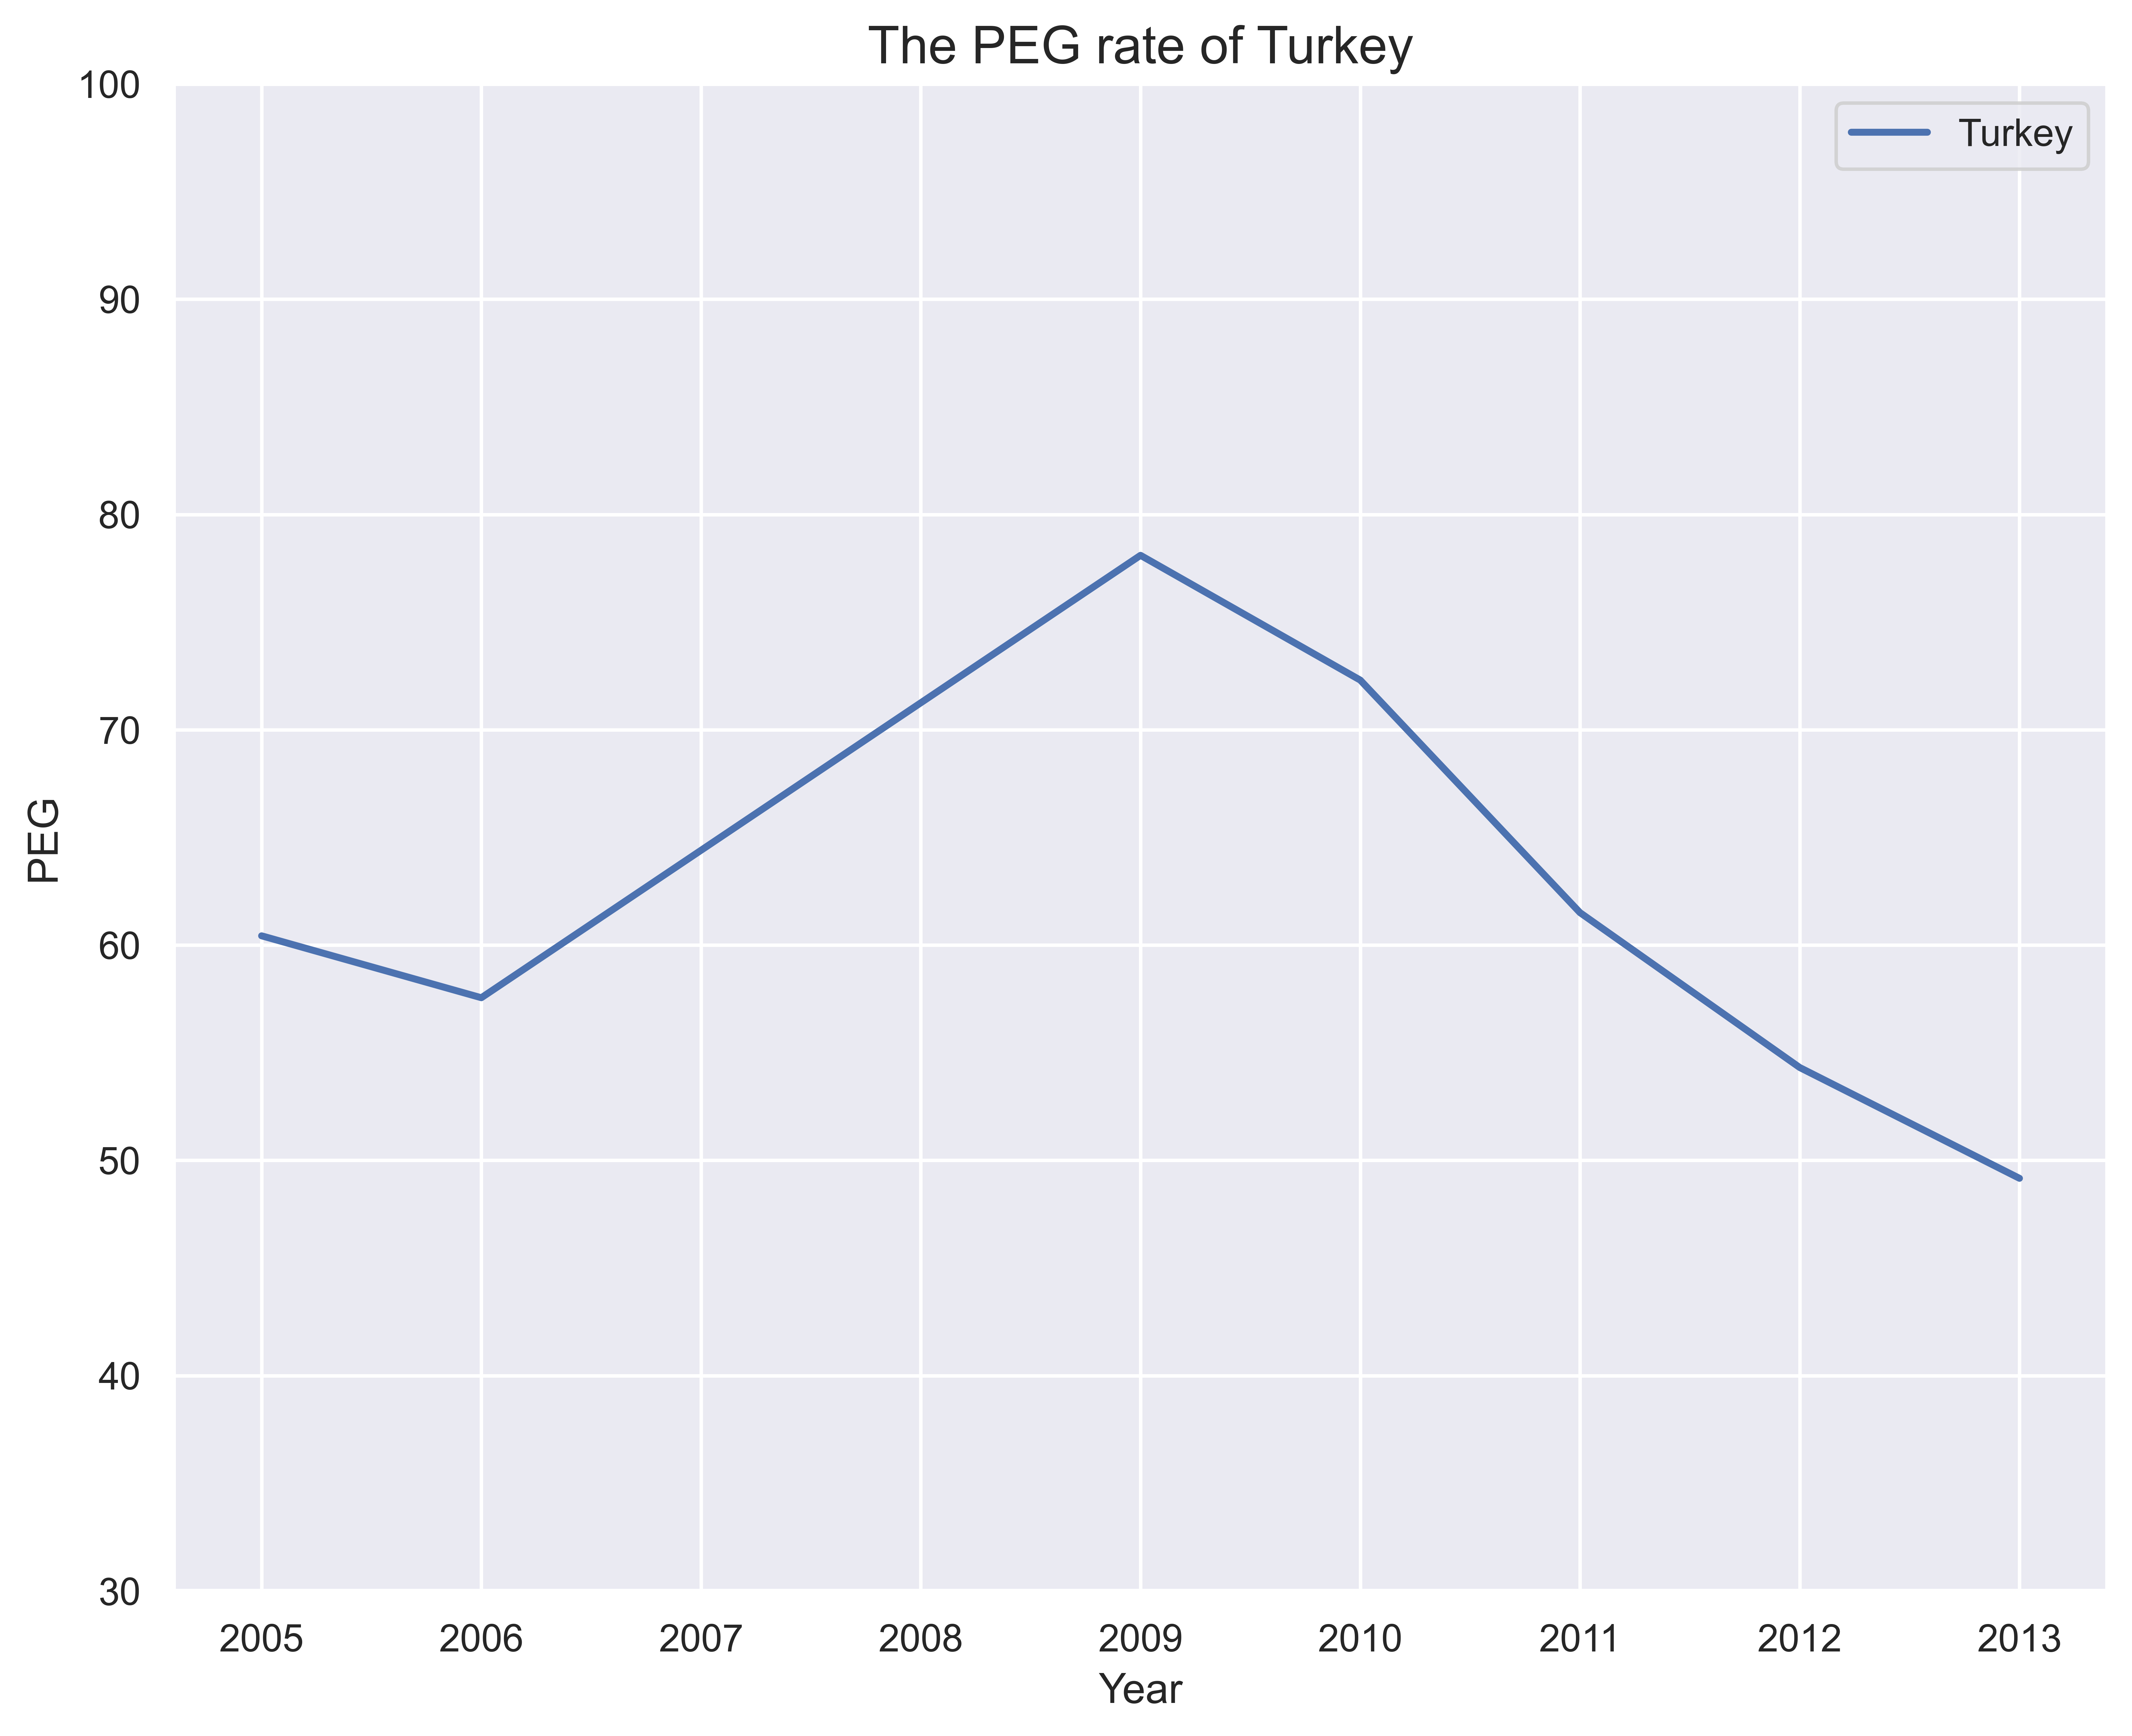

In [17]:
plt.figure(figsize=(10, 8), dpi=800)
plt.plot(r1,r2,label='Turkey',linewidth = 2)
plt.ylabel('PEG')
plt.xlabel('Year')
plt.ylim(30,100)
plt.title('The PEG rate of Turkey',fontsize='15')
plt.legend()
plt.show()

In [18]:
rate=df_complete_edu[((df_complete_edu["Entity"].isin([temp]))&(df_complete_edu["Year"].isin(year)))]

In [19]:
answer1

array([[0.41106442, 0.40376866, 0.37974772, 0.4203639 , 0.34967996,
        0.24977676, 0.26632052, 0.204625  , 0.22275605, 0.        ],
       [0.13960694, 0.430143  , 0.33625906, 0.08037938, 0.18648285,
        0.46627297, 0.2845858 , 0.5055593 , 0.        , 0.29528002],
       [0.12363689, 0.12299591, 0.02699708, 0.02717422, 0.56863049,
        0.2563695 , 0.4114255 , 0.60228599, 0.2168717 , 0.        ],
       [0.47784783, 0.37700722, 0.33592615, 0.3581685 , 0.39663559,
        0.03804543, 0.22497093, 0.        , 0.1247431 , 0.40429686],
       [0.55004371, 0.41172142, 0.10620376, 0.23669226, 0.32543786,
        0.26892269, 0.21610059, 0.34334366, 0.32734036, 0.10329407],
       [0.18187791, 0.53709037, 0.03556115, 0.21190007, 0.67882692,
        0.05488957, 0.12817381, 0.12224102, 0.05767001, 0.36574861]])

In [37]:
haha1=[]
for i in range(6):
    if i==2 :
        continue
    haha1.append(answer1[i][9])
haha1
haha2=[]
for i in range(6):
    if i==2:
        continue
    haha2.append(answer1[i][4])
haha1

[0.0,
 0.29528001661546804,
 0.40429685928175557,
 0.10329406763014944,
 0.3657486131033011]

In [21]:
import pyecharts.options as opts
from pyecharts.charts import Radar

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.baidu.com/examples/editor.html?c=radar

目前无法实现的功能:

1、雷达图周围的图例的 textStyle 暂时无法设置背景颜色
"""

(
    Radar(init_opts=opts.InitOpts(width="1280px", height="720px", bg_color="#CCCCCC"))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="销售（sales）", max_=0.7),
            opts.RadarIndicatorItem(name="管理（Administration）", max_=0.7),
            opts.RadarIndicatorItem(name="信息技术（Information Technology）", max_=0.7),
            opts.RadarIndicatorItem(name="客服（Customer Support）", max_=0.7),
            opts.RadarIndicatorItem(name="研发（Development）", max_=0.7),
            opts.RadarIndicatorItem(name="市场（Marketing）", max_=0.7),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#fff"),
    )
    .add(
        series_name="预算分配（Allocated Budget）",
        data=haha1,
        linestyle_opts=opts.LineStyleOpts(color="#CD0000"),
    )
    .add(
        series_name="实际开销（Actual Spending）",
        data=haha2,
        linestyle_opts=opts.LineStyleOpts(color="#5CACEE"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="基础雷达图"), legend_opts=opts.LegendOpts()
    )
    .render("basic_radar_chart.html")
)

'C:\\Users\\admin\\Desktop\\F\\basic_radar_chart.html'

In [24]:
import pyecharts.options as opts
from pyecharts.charts import Radar

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.baidu.com/examples/editor.html?c=radar

目前无法实现的功能:

1、雷达图周围的图例的 textStyle 暂时无法设置背景颜色
"""



(
    Radar(init_opts=opts.InitOpts(width="1280px", height="720px", bg_color="#CCCCCC"))
    .add_schema(
        schema=[
             opts.RadarIndicatorItem(name="销售（sales）", max_=0.7),
            opts.RadarIndicatorItem(name="管理（Administration）", max_=0.7),
            opts.RadarIndicatorItem(name="信息技术（Information Technology）", max_=0.7),
            opts.RadarIndicatorItem(name="客服（Customer Support）", max_=0.7),
            opts.RadarIndicatorItem(name="研发（Development）", max_=0.7),
            opts.RadarIndicatorItem(name="市场（Marketing）", max_=0.7),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#fff"),
    )
    .add(
        series_name="预算分配（Allocated Budget）",
        data=haha1,
        linestyle_opts=opts.LineStyleOpts(color="#CD0000"),
    )
    .add(
        series_name="实际开销（Actual Spending）",
        data=haha2,
        linestyle_opts=opts.LineStyleOpts(color="#5CACEE"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="基础雷达图"), legend_opts=opts.LegendOpts()
    )
    .render("basic_radar_chart.html")
)

'C:\\Users\\admin\\Desktop\\F\\basic_radar_chart.html'

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

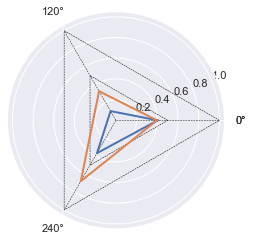

In [25]:
import numpy as np
import matplotlib.pyplot as plt
v1=pd.DataFrame(v1)
def plot_radar(data):
    '''
    the first column of the data is the cluster name;
    the second column is the number of each cluster;
    the last are those to describe the center of each cluster.
    '''
    kinds = data.iloc[:, 0]
    labels = data.iloc[:, 2:].columns
    centers = pd.concat([data.iloc[:, 2:], data.iloc[:,2]], axis=1)
    centers = np.array(centers)
    n = len(labels)
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True) # 设置坐标为极坐标
    
    # 画若干个五边形
    floor = np.floor(centers.min())     # 大于最小值的最大整数
    ceil = np.ceil(centers.max())       # 小于最大值的最小整数
    for i in np.arange(floor, ceil + 0.5, 0.5):
        ax.plot(angles, [i] * (n + 1), '--', lw=0.5 , color='black')
    
    # 画不同客户群的分割线
    for i in range(n):
        ax.plot([angles[i], angles[i]], [floor, ceil], '--', lw=0.5, color='black')
    
    # 画不同的客户群所占的大小
    for i in range(len(kinds)):
        ax.plot(angles, centers[i], lw=2, label=kinds[i])
        #ax.fill(angles, centers[i])
    
    ax.set_thetagrids(angles * 180 / np.pi, labels) # 设置显示的角度，将弧度转换为角度
    plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0)) # 设置图例的位置，在画布外
    
    ax.set_theta_zero_location('N')        # 设置极坐标的起点（即0°）在正北方向，即相当于坐标轴逆时针旋转90°
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    ax.grid(False)                         # 不显示默认的分割线
    ax.set_yticks([])                      # 不显示坐标间隔
    
    plt.show()
plot_radar(v1)

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (6).

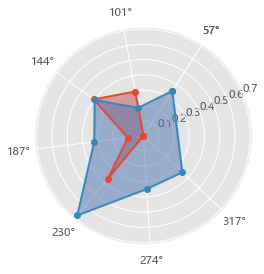

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 正常显示中文
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

#使用ggplot的风格绘图
plt.style.use('ggplot')

#构造数据

feature = ['个人能力','QC知识',"解决问题能力","服务质量意识","团队精神","IQ"]

N = len(haha1)

#生成角度
angles = np.linspace(1,2*np.pi,N,endpoint=False)

#数据闭合
haha1 = np.concatenate((haha1,[haha1[0]]))
angles = np.concatenate((angles,[angles[0]]))
haha2 = np.concatenate((haha2,[haha2[0]]))
#绘图
fig = plt.figure()
#设置为极坐标格式
ax = fig.add_subplot(111, polar=True)
#绘制折线图
ax.plot(angles,haha1,'o-',linewidth=2,label='活动前')
ax.fill(angles,haha1,'r',alpha=0.5)

#填充颜色
ax.plot(angles,haha2,'o-',linewidth=2,label='活动后')
ax.fill(angles,haha2,'b',alpha=0.5)

#通过这一个命令调整背景线
ax.set_thetagrids(angles*180/np.pi,feature)
#设置极轴范围
ax.set_ylim(0,1)
#添加标题
plt.title('活动前后员工状态')
#增加网格纸
ax.grid(True)
plt.legend()
plt.show()

In [40]:
N

6